# <center>Лабораторная работа 6</center>

##### Васютинский В.А.
##### М8О-408Б-20

Используя явную схему крест и неявную схему, решить начально-краевую задачу для дифференциального уравнения гиперболического типа. Аппроксимацию второго начального условия произвести с первым и со вторым порядком. Осуществить реализацию трех вариантов аппроксимации граничных условий, содержащих производные: двухточечная аппроксимация с первым порядком, трехточечная аппроксимация со вторым порядком, двухточечная аппроксимация со вторым порядком. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x, t)$. Исследовать зависимость погрешности от сеточных параметров $\tau, h$.

In [2]:

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Вариант 5:

(dU)^2/(dt)^2 + 2 * du/dt = (dU)^2/(dx)^2 + 2 * dU/dx - 3u

U(0, t) = exp(-t) * cos(2t)

U(Pi/2, t) = 0

U(x, 0) = exp(-x) * cos(x)

U_t(x, 0) = -exp(-x) * cos(x)

Аналитическое решение:

U(x, t) = exp(-t-x) * cos(x) * cos(2t)

## <center> Конечно-разностная схема </center>
<h3><center> Общая концепция </center></h3>
Будем решать задачу на заданном промежутке  от $0$ до $l$ по координате $x$ и на промежутке от $0$ до заданного параметра $T$ по времени $t$.

Рассмотрим конечно-разностную схему решения краевой задачи на сетке с граничными парамерами $l$, $T$ и параметрами насыщенности сетки $N$, $K$. Тогда размер шага по каждой из координат определяется:
$$h = \displaystyle\frac{l}{N-1}, \; \tau = \displaystyle\frac{T}{K-1}$$

Считая, что значения функции $u^k_j = u(x_j, t^k)$ для всех координат $x_j = j h, \; \forall j \in \{0, ..., N\}$ на предыдущих временных известно, попробуем определить значения функции на временном слое $t^{k+1}$ путем разностной апроксимации производной:
$$\displaystyle\frac{\partial^2 u}{\partial t^2}(x_j, t^k) = \displaystyle\frac{u^{k+1}_j - 2u^k_j + u^{k-1}_j}{\tau^2}$$

И одним из методов апроксимации второй производной по $x$:
$$\displaystyle\frac{\partial^2 u}{\partial x^2}(x_j, t^k)$$

Для расчета $u_j^0$ и $u_j^1$ можно использовать следующие формулы:
$$u_j^0 = \psi_1(x_j)$$
$$u_j^1 = \psi_1(x_j) + \tau \psi_2(x_j) + \frac{\tau^2}{2}\psi_1''(x_j) + O(\tau^2)$$
$$u_j^1 = \psi_1(x_j) + \tau \psi_2(x_j) + O(\tau^1)$$

**В данной лабораторной работе используется 3 вида аппроксимации граничных условий:**
1. двухточечная аппроксимация с первым порядком
2. трехтоточная аппроксимация со вторым порядком
3. двухточечная аппроксимация со вторым порядком

**Двухточечная аппроксимация с первым порядком**

$\dfrac{du}{dx}\bigg|^{k+1}_{j = 0} = \dfrac{u^{k+1}_1 - u^{k+1}_0}{h}$

$\dfrac{du}{dx}\bigg|^{k+1}_{j = N} = \dfrac{u^{k+1}_N - u^{k+1}_{N-1}}{h}$

**Трехтоточная аппроксимация со вторым порядком**

$\dfrac{du}{dx}\bigg|^{k+1}_{j = 0} = \dfrac{-3u^{k+1}_0 + 4u^{k+1}_1 - u^{k+1}_2}{2h}$

$\dfrac{du}{dx}\bigg|^{k+1}_{j = N} = \dfrac{u^{k+1}_{N - 2} - 4u^{k+1}_{N - 1} + 3u^{k+1}_N}{2h}$

**Двухточечная аппроксимация со вторым порядком**

Разложим в граничных узлах на точном решении значение $u^{k+1}_1$ и $u^{k+1}_{N-1}$ в окрестности точки $x=0$ в ряд Тейлора по переменной $x$ до третьей производной включительно

$u^{k+1}_1 = u(0 + h, t^{k + 1}) = u^{k+1}_0 + \dfrac{du}{dx}\bigg|^{k + 1}_{0}\cdot h + \dfrac{d^2u}{dx^2}\bigg|^{k + 1}_{0}\cdot\dfrac{h^2}{2}$

$u^{k+1}_{N-1} = u(l - h, t^{k + 1}) = u^{k+1}_N - \dfrac{du}{dx}\bigg|^{k + 1}_{N}\cdot h + \dfrac{d^2u}{dx^2}\bigg|^{k + 1}_{N}\cdot\dfrac{h^2}{2}$

In [167]:
    def __init__(self, params, equation_type):
        self.data = Data(params)
        self.h = 0
        self.tau = 0
        self.sigma = 0
        try:
            self.solve_func = getattr(self, f'{equation_type}_solver')
        except:
            raise Exception("This type does not exist")

    def solve(self, N, K, T):
        self.h = self.data.l / N
        self.tau = T / K
        self.sigma = (self.tau ** 2) / (self.h ** 2)
        return self.solve_func(N, K, T)

    def analyticSolve(self, N, K, T):
        self.h = self.data.l / N
        self.tau = T / K
        self.sigma = (self.tau ** 2) / (self.h ** 2)
        u = np.zeros((K, N))
        for k in range(K):
            for j in range(N):
                u[k][j] = self.data.solution(j * self.h, k * self.tau)
        return u

    def calculate(self, N, K):
        u = np.zeros((K, N))

        for j in range(0, N - 1):
            x = j * self.h
            u[0][j] = self.data.psi1(x)

            if self.data.approximation == 'p1':
                u[1][j] = self.data.psi1(x) + self.data.psi2(x) * self.tau + self.data.psi1_dir2(x) * \
                          (self.tau ** 2 / 2)
            elif self.data.approximation == 'p2':
                u[1][j] = self.data.psi1(x) + self.data.psi2(x) * self.tau + \
                          (self.data.psi1_dir2(x) + self.data.b * self.data.psi1_dir1(x) +
                           self.data.c * self.data.psi1(x) + self.data.f()) * (self.tau ** 2 / 2)

        return u

    def implicit_solver(self, N, K, T):
        u = self.calculate(N, K)

        a = np.zeros(N)
        b = np.zeros(N)
        c = np.zeros(N)
        d = np.zeros(N)

        for k in range(2, K):
            for j in range(1, N):
                a[j] = self.sigma
                b[j] = -(1 + 2 * self.sigma)
                c[j] = self.sigma
                d[j] = -2 * u[k - 1][j] + u[k - 2][j]

            if self.data.bound_type == 'a1p2':
                b[0] = self.data.alpha / self.h / (self.data.beta - self.data.alpha / self.h)
                c[0] = 1
                d[0] = 1 / (self.data.beta - self.data.alpha / self.h) * self.data.phi0(k * self.tau)
                a[-1] = -self.data.gamma / self.h / (self.data.delta + self.data.gamma / self.h)
                d[-1] = 1 / (self.data.delta + self.data.gamma / self.h) * self.data.phi1(k * self.tau)

            elif self.data.bound_type == 'a2p3':
                k1 = 2 * self.h * self.data.beta - 3 * self.data.alpha
                omega = self.tau ** 2 * self.data.b / (2 * self.h)
                xi = self.data.d * self.tau / 2

                b[0] = 4 * self.data.alpha - self.data.alpha / (self.sigma + omega) * \
                       (1 + xi + 2 * self.sigma - self.data.c * self.tau ** 2)
                c[0] = k1 - self.data.alpha * (omega - self.sigma) / (omega + self.sigma)
                d[0] = 2 * self.h * self.data.phi0(k * self.tau) + self.data.alpha * d[1] / (-self.sigma - omega)
                a[-1] = -self.data.gamma / (omega - self.sigma) * \
                        (1 + xi + 2 * self.sigma - self.data.c * self.tau ** 2) - 4 * self.data.gamma
                d[-1] = 2 * self.h * self.data.phi1(k * self.tau) - self.data.gamma * d[-2] / (omega - self.sigma)

            elif self.data.bound_type == 'a2p2':
                b[0] = 2 * self.data.a / self.h
                c[0] = -2 * self.data.a / self.h + self.h / self.tau ** 2 - self.data.c * self.h + \
                       -self.data.d * self.h / (2 * self.tau) + \
                       self.data.beta / self.data.alpha * (2 * self.data.a + self.data.b * self.h)
                d[0] = self.h / self.tau ** 2 * (u[k - 2][0] - 2 * u[k - 1][0]) - self.h * self.data.f() + \
                       -self.data.d * self.h / (2 * self.tau) * u[k - 2][0] + \
                       (2 * self.data.a - self.data.b * self.h) / self.data.alpha * self.data.phi0(k * self.tau)
                a[-1] = -b[0]
                d[-1] = self.h / self.tau ** 2 * (-u[k - 2][0] + 2 * u[k - 1][0]) + self.h * self.data.f() + \
                        self.data.d * self.h / (2 * self.tau) * u[k - 2][0] + \
                        (2 * self.data.a + self.data.b * self.h) / self.data.alpha * self.data.phi1(k * self.tau)

            u[k] = tma(a, b, c, d)

        return u

    def _left_bound_a1p2(self, u, k, t):
        coeff = self.data.alpha / self.h
        return (-coeff * u[k - 1][1] + self.data.phi0(t)) / (self.data.beta - coeff)

    def _right_bound_a1p2(self, u, k, t):
        coeff = self.data.gamma / self.h
        return (coeff * u[k - 1][-2] + self.data.phi1(t)) / (self.data.delta + coeff)

    def _left_bound_a2p2(self, u, k, t):
        n = self.data.c * self.h - 2 * self.data.a / self.h - self.h / self.tau ** 2 - self.data.d * self.h / \
            (2 * self.tau) + self.data.beta / self.data.alpha * (2 * self.data.a - self.data.b * self.h)
        return 1 / n * (- 2 * self.data.a / self.h * u[k][1] +
                        self.h / self.tau ** 2 * (u[k - 2][0] - 2 * u[k - 1][0]) +
                        -self.data.d * self.h / (2 * self.tau) * u[k - 2][0] + -self.h * self.data.f() +
                        (2 * self.data.a - self.data.b * self.h) / self.data.alpha * self.data.phi0(t))

    def _right_bound_a2p2(self, u, k, t):
        n = -self.data.c * self.h + 2 * self.data.a / self.h + self.h / self.tau ** 2 + self.data.d * self.h / \
            (2 * self.tau) + self.data.delta / self.data.gamma * (2 * self.data.a + self.data.b * self.h)
        return 1 / n * (2 * self.data.a / self.h * u[k][-2] +
                        self.h / self.tau ** 2 * (2 * u[k - 1][-1] - u[k - 2][-1]) +
                        self.data.d * self.h / (2 * self.tau) * u[k - 2][-1] + self.h * self.data.f() +
                        (2 * self.data.a + self.data.b * self.h) / self.data.gamma * self.data.phi1(t))

    def _left_bound_a2p3(self, u, k, t):
        denom = 2 * self.h * self.data.beta - 3 * self.data.alpha
        return self.data.alpha / denom * u[k - 1][2] - 4 * self.data.alpha / denom * u[k - 1][1] + \
               2 * self.h / denom * self.data.phi0(t)

    def _right_bound_a2p3(self, u, k, t):
        denom = 2 * self.h * self.data.delta + 3 * self.data.gamma
        return 4 * self.data.gamma / denom * u[k - 1][-2] - self.data.gamma / denom * u[k - 1][-3] + \
               2 * self.h / denom * self.data.phi1(t)

    def explicit_solver(self, N, K, T):
        global left_bound, right_bound
        u = self.calculate(N, K)

        # for j in range(1, N - 1):
        #     u[1][j] = self.data.ps1()
        if self.data.bound_type == 'a1p2':
            left_bound = self._left_bound_a1p2
            right_bound = self._right_bound_a1p2

        elif self.data.bound_type == 'a2p2':
            left_bound = self._left_bound_a2p2
            right_bound = self._right_bound_a2p2

        elif self.data.bound_type == 'a2p3':
            left_bound = self._left_bound_a2p3
            right_bound = self._right_bound_a2p3

        for k in range(2, K):
            t = k * self.tau
            for j in range(1, N - 1):
                # u[k][j] = self.sigma * u[k - 1][j + 1] + (2 - 2 * self.sigma) * u[k - 1][j] + \
                #           self.sigma * u[k - 1][j - 1] - u[k - 2][j]
                quadr = self.tau ** 2
                tmp1 = self.sigma + self.data.b * quadr / (2 * self.h)
                tmp2 = self.sigma - self.data.b * quadr / (2 * self.h)
                u[k][j] = u[k - 1][j + 1] * tmp1 + \
                    u[k - 1][j] * (-2 * self.sigma + 2 + self.data.c * quadr) + \
                    u[k - 1][j - 1] * tmp2 - u[k - 2][j] + quadr * self.data.f()

            u[k][0] = left_bound(u, k, t)
            u[k][-1] = right_bound(u, k, t)

        return u

Input equation type (example: explicit)

In [23]:
equation_type = str(input())

implicit


In [3]:
N = 70
K = 764
T = 1
params = {
        'a': 1,
        'b': 2,
        'c': -3,
        'd': 2,
        'l': np.pi / 2,
        'f': lambda: 0,
        'alpha': 1,
        'beta': 0,
        'gamma': 1,
        'delta': 0,
        'psi1': lambda x: np.exp(-x) * np.cos(x),
        'psi2': lambda x: -np.exp(-x) * np.cos(x),
        'psi1_dir1': lambda x: -np.exp(-x) * np.sin(x) - np.exp(-x) * np.cos(x),
        'psi1_dir2': lambda x: 2 * np.exp(-x) * np.sin(x),
        'phi0': lambda t: np.exp(-t) * np.cos(2 * t),
        'phi1': lambda t: 0,
        'bound_type': 'a1p2',
        'approximation': 'p1',
        'solution': lambda x, t: np.exp(-t - x) * np.cos(x) * np.cos(2 * t),
    }

In [161]:
params['bound_type'] = 'a1p2'

In [162]:
solver = HyperbolicSolver(params, equation_type)

In [163]:
dict_ans = {
        'numerical': solver.solve(N, K, T).tolist(),
        'analytic': solver.analyticSolve(N, K, T).tolist()
    }

In [164]:
print("Sigma:", solver.sigma)

Sigma: 0.0001562269833579535


In [4]:
def draw(dict_, N, K, T, save_file="plot.png"):
    fig = plt.figure(figsize=plt.figaspect(0.3))
    # Make data
    x = np.arange(0, np.pi / 2, np.pi / 2 / N)
    t = np.arange(0, T, T / K)
    x, t = np.meshgrid(x, t)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])

    # Plot the surface.
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    plt.title('numerical')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    surf = ax.plot_surface(x, t, z1, cmap=cm.PiYG,
                    linewidth=0, antialiased=True)
    fig.colorbar(surf, shrink=0.5, aspect=15)

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    plt.title('analytic')
    surf = ax.plot_surface(x, t, z2, cmap=cm.PiYG,
                           linewidth=0, antialiased=True)
    # # Customize the z axis
    # ax.set_zlim(-1.01, 1.01)

    # # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=15)

    plt.savefig(save_file)
    plt.show()

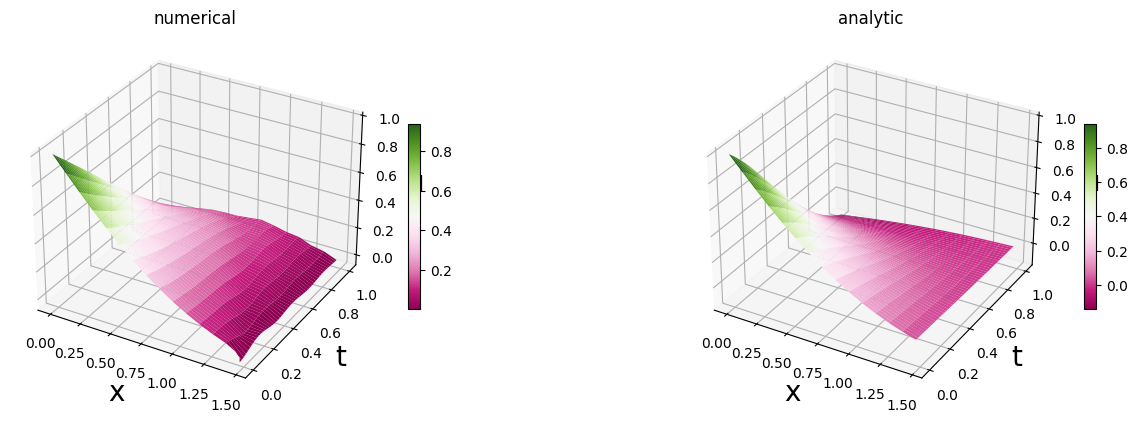

In [166]:
draw(dict_ans, N, K, T)

In [5]:
def draw_u_x(dict_, N, K, T, time, save_file="plot_u_x.png"):
    fig = plt.figure()
    x = np.arange(0, np.pi / 2, np.pi / 2 / N)
    t = np.arange(0, T, T / K)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])
    

    plt.title('U from x')
    plt.plot(x, z1[time], color='r', label='numerical')
    plt.plot(x, z2[time], color='b', label='analytic')
    plt.legend(loc='best')
    plt.ylabel('U')
    plt.xlabel('x')
    plt.savefig(save_file)
    plt.show()
    
    err = []
    error = compare_error(dict_ans)
    for i in range(len(error)):
        tmp = 0
        for j in error[i]:
            tmp += j
        err.append(tmp/len(error[i])/100)
    plt.title('Error from t')
    plt.plot(t, err, color='b', label='err')
    plt.legend(loc='best')
    plt.ylabel('Err')
    plt.xlabel('t')
    plt.savefig('err.png')
    plt.show()

Time check

In [151]:
curr_time = int(input())

0


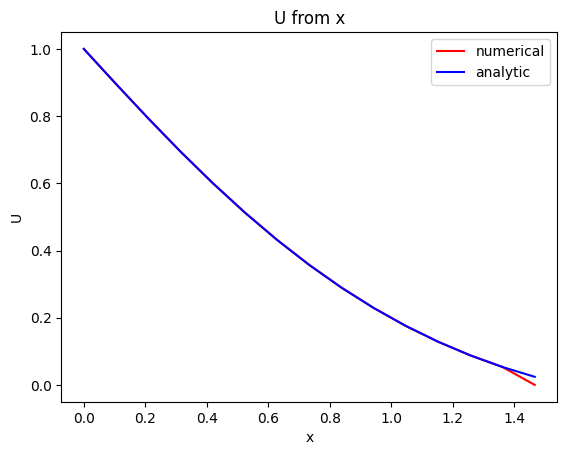

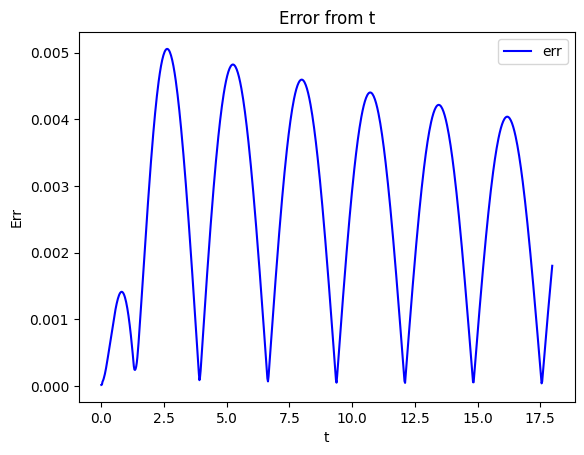

In [152]:
draw_u_x(dict_ans, N, K, T, curr_time)

In [15]:
error = compare_error(dict_ans)
avg_err = 0.0
for i in error:
    for j in i:
        avg_err += j
    avg_err /= N

First elements in error array:

In [154]:
print(error[0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.024128237579537793]


Middle elements in error array:

In [155]:
print(error[int(K/2)])

[0.3044762038386517, 0.3044762334332204, 0.2994188189570114, 0.2894504364303297, 0.2748551792683484, 0.2560367496852061, 0.23349320413421115, 0.20778590637899103, 0.1795042423397761, 0.14922831812452045, 0.1174933476038538, 0.0847612237406379, 0.051405621568235006, 0.017715618530681196, 0.01608113554310606]


Last elements in error array:

In [156]:
print(error[-1])

[0.2921004025324187, 0.2921004025314303, 0.28752958574649945, 0.27849632904351407, 0.2652105105058831, 0.2479704980878237, 0.2271454049073953, 0.20315452449243993, 0.1764461562771477, 0.1474780692676288, 0.11670161067030362, 0.08455096067921172, 0.05143831697252177, 0.017754951815329042, 0.016122762769763675]


In [157]:
print(f'Average error in each N: {avg_err}')

Average error in each N: 0.19243289755052845


In [158]:
print(f'Average error\t\t: {avg_err / K}')

Average error		: 0.0002518755203540948


In [12]:
equation_type = str(input())

implicit


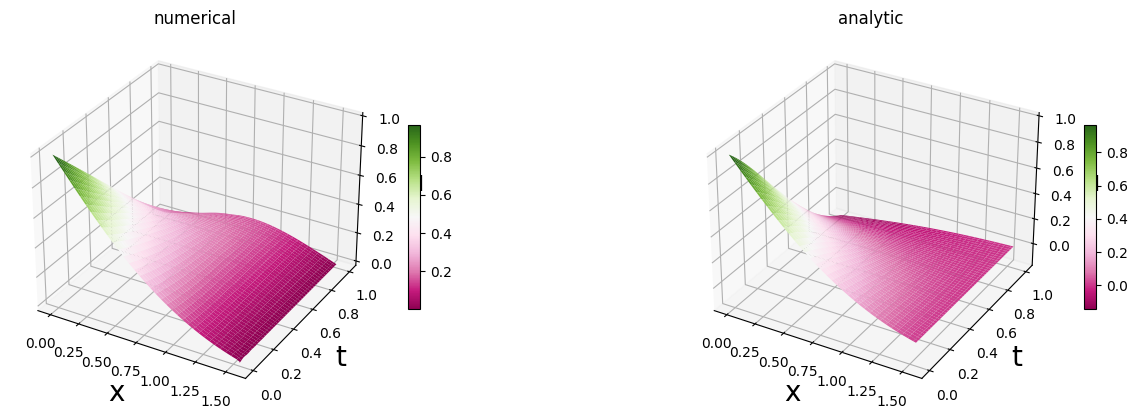

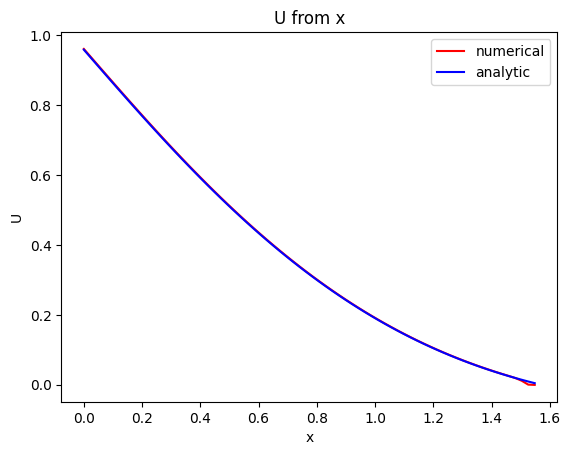

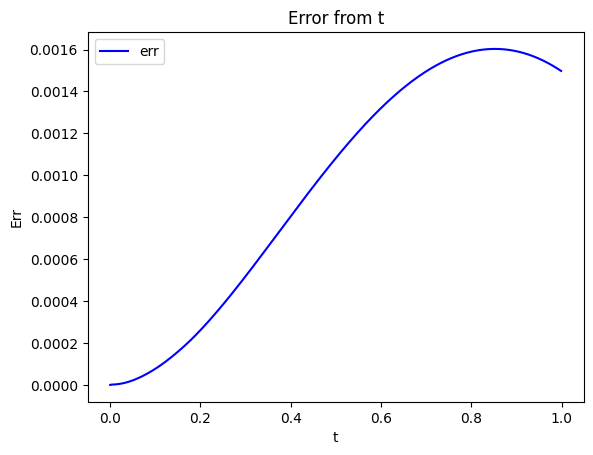

In [18]:
N = 70
K = 764
T = 1
curr_time = 30
params['bound_type'] = 'a1p2'
solver = HyperbolicSolver(params, equation_type)
dict_ans = {
        'numerical': solver.solve(N, K, T).tolist(),
        'analytic': solver.analyticSolve(N, K, T).tolist()
    }
draw(dict_ans, N, K, T)
draw_u_x(dict_ans, N, K, T, curr_time)